In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

## Analysing the data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.isnull().sum() #check for any missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train[train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
train['Salutation'] = train.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [5]:
train['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [6]:
#analysing some salutation values.
words = ['Mlle', 'Mme', 'Rev', 'Countess', 'Jonkheer', 'Col']
for gender, age, name ,salutation in zip(train['Sex'],train['Age'] , train['Name'] ,train['Salutation']):
    if salutation in words:
        print(gender, age, name, salutation)

male 42.0 Byles, Rev. Thomas Roussel Davids Rev
male 51.0 Bateman, Rev. Robert James Rev
male 54.0 Carter, Rev. Ernest Courtenay Rev
female 24.0 Aubart, Mme. Leontine Pauline Mme
male 57.0 Kirkland, Rev. Charles Leonard Rev
female 24.0 Sagesser, Mlle. Emma Mlle
male 56.0 Simonius-Blumer, Col. Oberst Alfons Col
male 60.0 Weir, Col. John Col
female 24.0 Mayne, Mlle. Berthe Antonine ("Mrs de Villiers") Mlle
female 33.0 Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards) Countess
male 38.0 Reuchlin, Jonkheer. John George Jonkheer
male 28.0 Harper, Rev. John Rev
male 27.0 Montvila, Rev. Juozas Rev


In [7]:
train['Salutation'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
    inplace=True
)

In [8]:
train['Age'].groupby(train['Salutation']).mean() #average age value for each salutation

Salutation
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [9]:
train.loc[(train.Age.isnull()) & (train.Salutation =='Master'),'Age'] = 5
train.loc[(train.Age.isnull()) & (train.Salutation =='Miss'),'Age'] = 22
train.loc[(train.Age.isnull()) & (train.Salutation =='Mr'),'Age'] = 33
train.loc[(train.Age.isnull()) & (train.Salutation =='Mrs'),'Age'] = 36
train.loc[(train.Age.isnull()) & (train.Salutation =='Other'),'Age'] = 46

In [10]:
train.isnull().sum() #now null values present in the cabin column and embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Salutation       0
dtype: int64

In [11]:
train_new = train.drop(['PassengerId', 'Embarked', 'Name', 'Ticket', 'Salutation', 'Cabin'], axis=1) #removing unwanted features

In [28]:
train_new['Sex'].replace(
    ['male', 'female'],
    [0, 1], inplace=True
)

#replace male as 0 and female as 1

In [29]:
train_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,22.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [30]:
train_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
Age,891.0,29.841942,13.281525,0.42,22.0000,30.0000,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

### Checking if Ticket fare has any relationship with survival rate

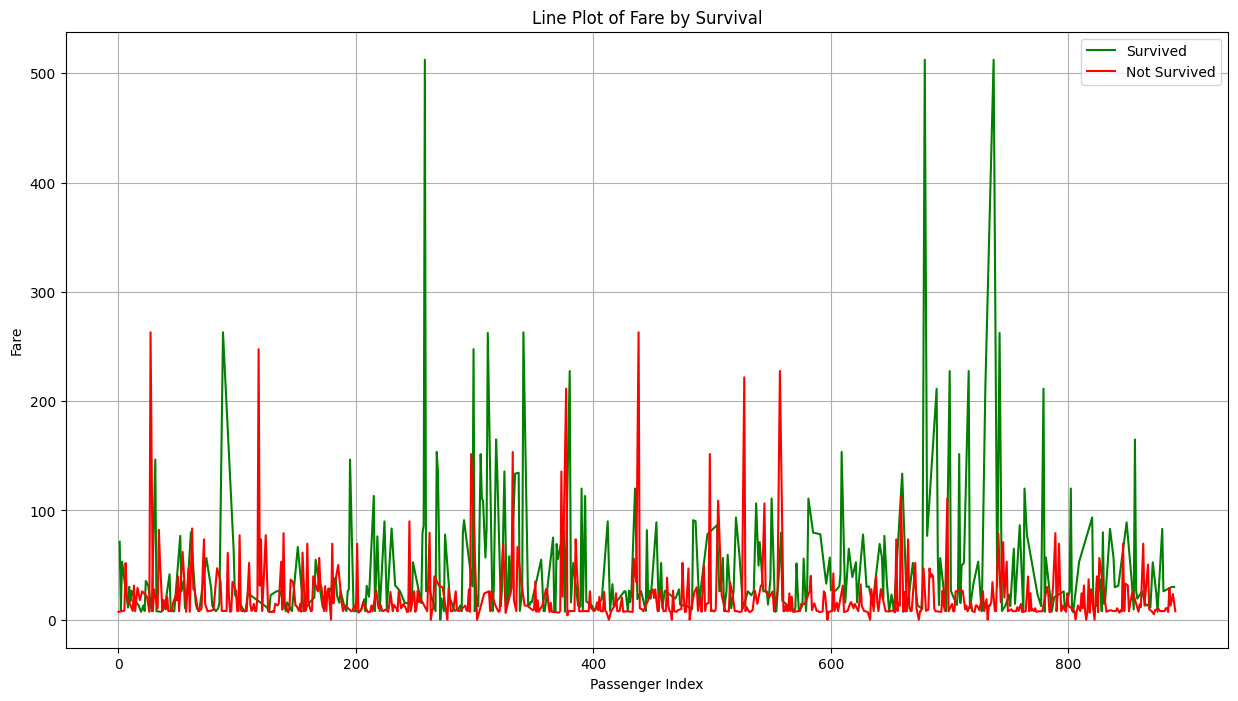

In [14]:
# Create a line plot of 'Fare' with different colors for survived and not survived
plt.figure(figsize=(15, 8))

# Plot 'Fare' for survived passengers in green
plt.plot(train_new[train_new['Survived'] == 1]['Fare'], color='green', label='Survived')

# Plot 'Fare' for not survived passengers in red
plt.plot(train_new[train_new['Survived'] == 0]['Fare'], color='red', label='Not Survived')

plt.xlabel('Passenger Index')
plt.ylabel('Fare')
plt.title('Line Plot of Fare by Survival')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
train_new.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Univariate Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


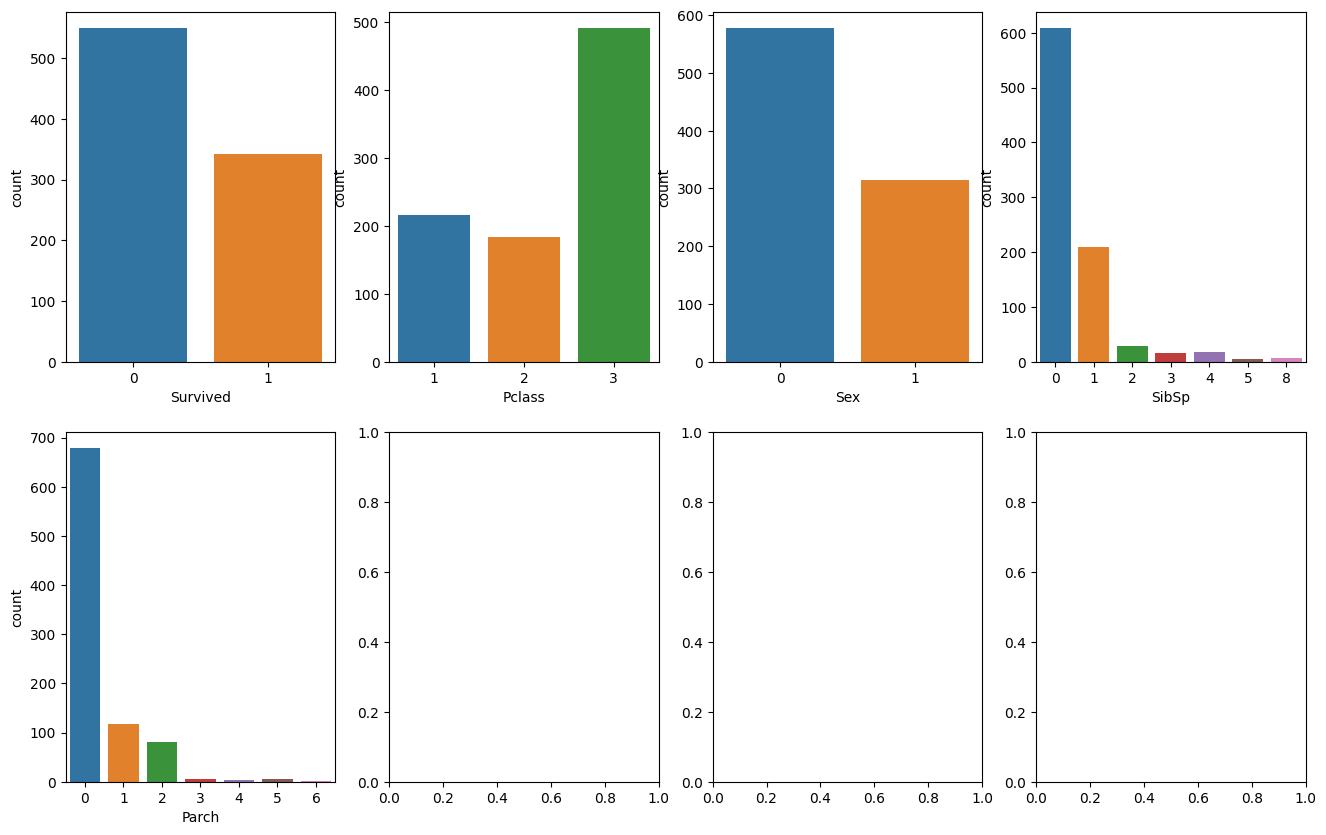

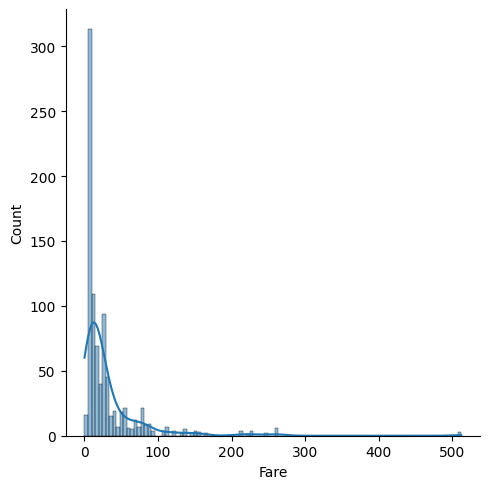

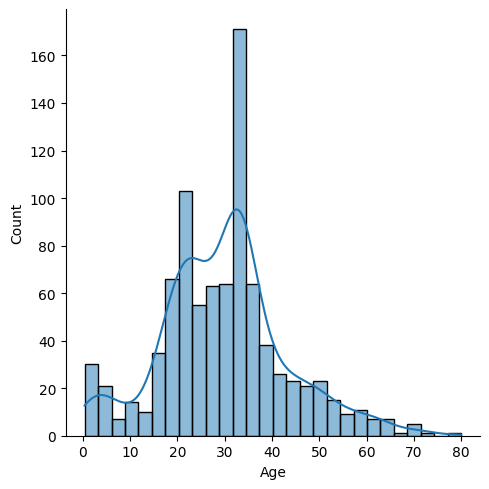

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x = 'Survived',data=train_new,ax=axes[0,0])
sns.countplot(x = 'Pclass',data=train_new,ax=axes[0,1])
sns.countplot(x = 'Sex',data=train_new,ax=axes[0,2])
sns.countplot(x = 'SibSp',data=train_new,ax=axes[0,3])
sns.countplot(x = 'Parch',data=train_new,ax=axes[1,0])
sns.displot(train_new['Fare'], kde=True,ax=axes[1,2])
sns.displot(train_new['Age'],kde=True,ax=axes[1,3])

### Bivariate Analysis

[]

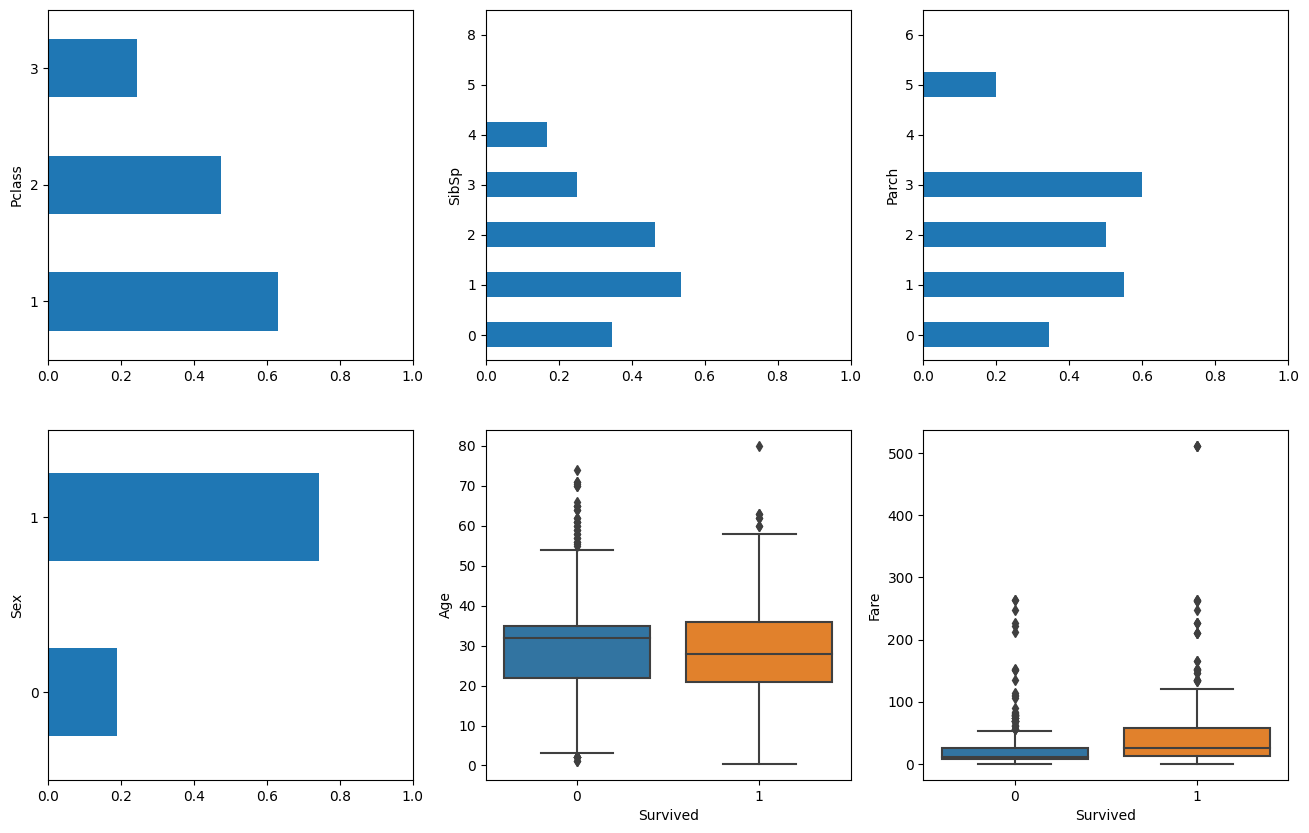

In [34]:
figbi, axesbi = plt.subplots(2, 3, figsize=(16, 10))
train_new.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train_new.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train_new.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train_new.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train_new,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train_new,ax=axesbi[1,2])
plt.plot()

### Analysing the distribution of the fare values and removing outliers


[]

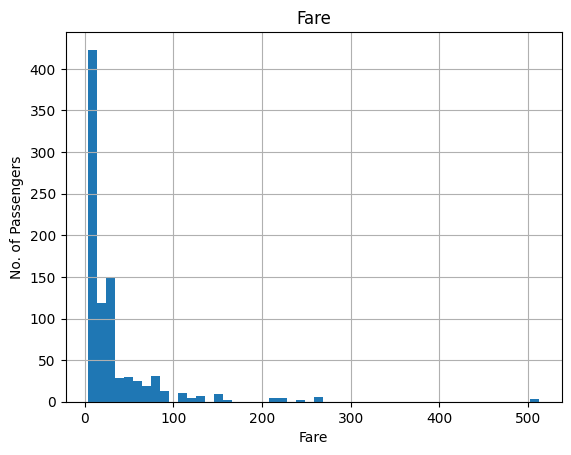

In [61]:
figure=train_new.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers')
plt.plot() 

In [59]:
print((train_new.Fare == 0).sum()) #records where fare is zero

0


In [54]:
train_new.Fare.mean()

32.204207968574636

In [58]:
#fare can never be zero, so imputing zero values with mean fare value
train_new.loc[train_new.Fare == 0, 'Fare'] = train_new.Fare.mean()

In [60]:
IQR= train_new.Fare.quantile(0.75)-train_new.Fare.quantile(0.25)
lower_bridge=train_new['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=train_new['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-28.49381195286195
68.6230199214366


(None, None)

In [62]:
#removing outliers in fare using IQR method.
train_new.loc[train_new['Fare']>=upper_bridge,'Fare'] = upper_bridge

[]

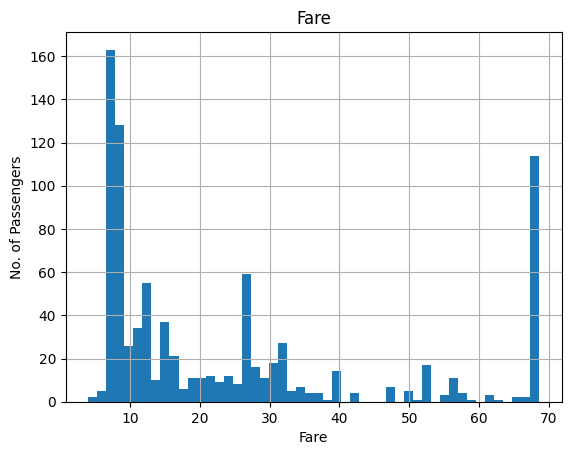

In [63]:
figure=train_new.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers')
plt.plot() 

### Correlation Matrix

[]

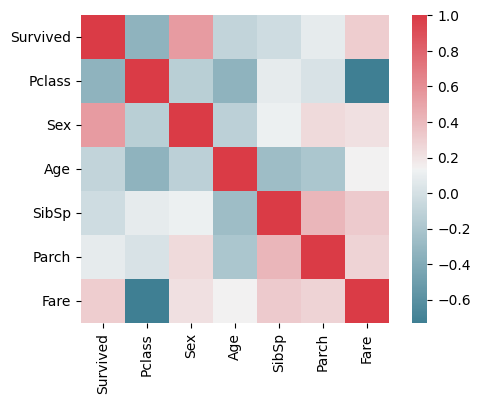

In [64]:
import seaborn as sns

f, ax = plt.subplots(figsize=(6, 4))
corr = train_new.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.plot()

In [66]:
train_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0000,0.000,0.0,1.000000,1.00000
Pclass,891.0,2.308642,0.836071,1.0000,2.000,3.0,3.000000,3.00000
Sex,891.0,0.352413,0.477990,0.0000,0.000,0.0,1.000000,1.00000
Age,891.0,29.841942,13.281525,0.4200,22.000,30.0,36.000000,80.00000
SibSp,891.0,0.523008,1.102743,0.0000,0.000,0.0,1.000000,8.00000
Parch,891.0,0.381594,0.806057,0.0000,0.000,0.0,0.000000,6.00000
Fare,891.0,24.973522,21.051842,4.0125,7.925,15.1,32.204208,68.62302
